# 4.10 IC Extra Key Business Questions

### This script contains the following points: <br> <br> 
1. Importing Libraries <br> <br> 
2. Importing Data Sets <br> <br> 
3. Data Checks <br><br>
4. Price Distributions <br><br>
5. Popular Products <br>

## 01 Import Libraries

In [1]:
# Import Libraries with visualization capabilities
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy


## 02 Import Data

In [2]:
# First create a string of the path for the main project folder
path = r'/Users/mistystone/Library/CloudStorage/OneDrive-Personal/Documents/CF_Data_Ach4_Python/2023-05_Instacart_Basket_Analysis/'

In [3]:
# Import pickle files
df = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data','high_activity_customers.pkl')) 

## 03 Data Checks

In [4]:
# Check Data top
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequent_flag,gender,state,age,date_joined,number_dependents,family_status,income,region,low_activity_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular customer,Female,Alabama,31,2/17/2019,3,married,40423,South,NaN


In [5]:
# Check Data shape
df.shape

(30964564, 32)

In [6]:
# Check Data Columns
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'Busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_spend', 'spend_flag', 'frequent_orders', 'frequent_flag',
       'gender', 'state', 'age', 'date_joined', 'number_dependents',
       'family_status', 'income', 'region', 'low_activity_flag'],
      dtype='object')

## 04 Price Distributions

In [7]:
# Frequency distribution by price category
df['price_range_loc'].value_counts().sort_index()

High-range poduct      393076
Low-range product     9674840
Mid-range product    20891771
Name: price_range_loc, dtype: int64

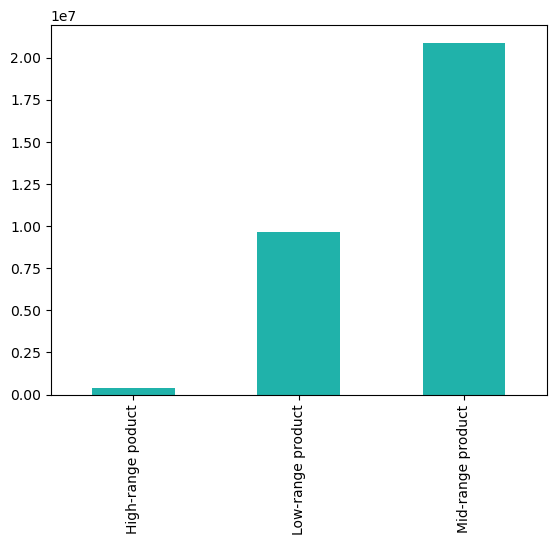

In [8]:
# Create bar chart
bar_price_range = df['price_range_loc'].value_counts().sort_index().plot.bar(color = ['lightseagreen'])

In [9]:
# Export
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range.png'), bbox_inches='tight')

## 05 Popular Products: Frequency by Department_id

In [10]:
# Import csv file: Departments
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col = [0])

In [11]:
# Data check
df_departments

,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta
10,bulk


In [12]:
# Rename
df_departments.index.names = ['department_id']

In [13]:
# Data Check
df_departments

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [14]:
# Frequencies for department_id
depts_freq = df['department_id'].value_counts().sort_index()

In [15]:
# Check
depts_freq

1     2121731
2       34411
3     1120828
4     9079273
5      144627
6      255991
7     2571901
8       93060
9      822136
10      33451
11     424306
12     674781
13    1782705
14     670850
15    1012074
16    5177182
17     699857
18     410392
19    2766406
20    1003834
21      64768
Name: department_id, dtype: int64

In [16]:
# Series depts_freq into a dataframe
df_depts_freq = depts_freq.to_frame().reset_index()

In [17]:
# Check
df_depts_freq

,index,department_id
0,1,2121731
1,2,34411
2,3,1120828
3,4,9079273
4,5,144627
5,6,255991
6,7,2571901
7,8,93060
8,9,822136
9,10,33451


In [19]:
# Concatenate
df_concat= pd.concat([df_depts_freq, df_departments], axis = 1)

In [20]:
# Data Check
df_concat

,index,department_id,department
0,1.0,2121731.0,NaN
1,2.0,34411.0,frozen
2,3.0,1120828.0,other
3,4.0,9079273.0,bakery
4,5.0,144627.0,produce
5,6.0,255991.0,alcohol
6,7.0,2571901.0,international
7,8.0,93060.0,beverages
8,9.0,822136.0,pets
9,10.0,33451.0,dry goods pasta


In [21]:
# rename columns
df_concat.rename(columns = {'department_id' : 'frequency'}, inplace = True)

In [22]:
# Delete missing values
df_concat.drop(labels = 
              [21, 0], axis=0, inplace=True)

In [23]:
# Delete a column
df_dept_freq = df_concat.drop(columns = ['index'])

In [24]:
# Define index
df_deptfreq = df_dept_freq.set_index('department')

In [25]:
df_deptfreq

,frequency
department,
frozen,34411.0
other,1120828.0
bakery,9079273.0
produce,144627.0
alcohol,255991.0
international,2571901.0
beverages,93060.0
pets,822136.0
dry goods pasta,33451.0


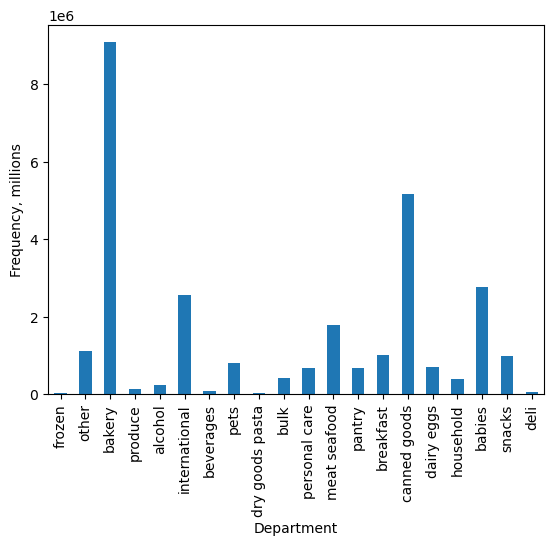

In [27]:
# Create bar chart
bar_dept_freq = df_deptfreq['frequency'].plot.bar(xlabel="Department", ylabel="Frequency, millions", legend=False)

In [28]:
# Export
bar_dept_freq.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_dept_freq.png'), bbox_inches='tight')